In [1]:
using Luna
using DSP
using Polynomials
using PyPlot
pygui(true)

true

In [2]:
t = collect(range(-500, 500, 1001))

fwhm = 150
w0 = 2pi*(1/50)

# adding quadratic phase (GDD)
phi2 = 0.0005
phi = phi2 .* 1/2 .* t.^2

σ = fwhm / (2*(2*log(2))^(1 / 2))
gauss = exp.(-1/2 .* ((t)./σ).^2)
signal = gauss .* cos.(w0.*t .+ phi)

1001-element Vector{Float64}:
  3.9493276569976043e-14
  4.241844457113597e-14
  4.4698129945823706e-14
  4.608616894952966e-14
  4.630114017214381e-14
  4.502608965589517e-14
  4.1909215535595746e-14
  3.6565714134967655e-14
  2.8581003411608075e-14
  1.751555112828909e-14
  ⋮
 -1.0928375771948343e-13
 -9.656022217961537e-14
 -7.358226562086806e-14
 -4.562583990918388e-14
 -1.7526559237242442e-14
  6.881554634958997e-15
  2.5075801788257153e-14
  3.5912526984223686e-14
  3.949327656997627e-14

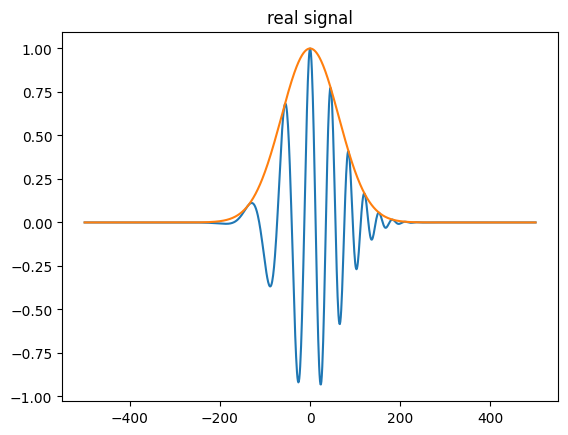

In [25]:
plt.figure()
plt.title("real signal")
plt.plot(t, signal)
plt.plot(t, gauss)
plt.gcf()

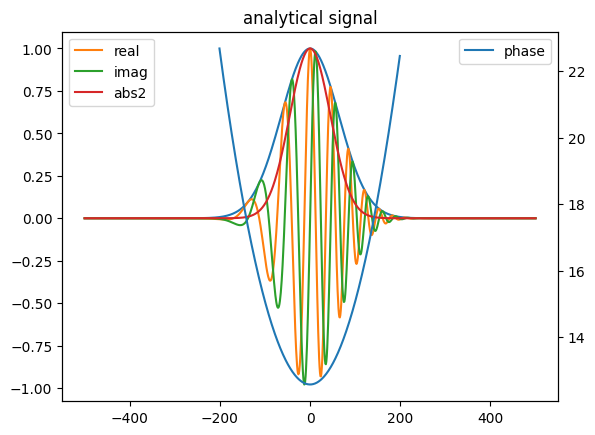

In [27]:
signal_a = hilbert(signal)
ϕ = unwrap(angle.(signal_a)) .- w0.*t

fig, ax1 = plt.subplots()
ax1.set_title("analytical signal")
ax1.plot(t, gauss)
ax1.plot(t, real(signal_a), label="real")
ax1.plot(t, imag(signal_a), label="imag")
ax1.plot(t, abs2.(signal_a), label="abs2")

ax2 = ax1.twinx()
ax2.plot(t[300:700], ϕ[300:700], label="phase")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.gcf()

In [28]:
# checking if quadratic phase from the analytical signal is the same as for our original real signal
p = fit(t[300:700], ϕ[300:700], 2)
println(p)
println("phi2 = ",p[2]*2)

12.5658 - 7.8646e-6*x + 0.000250084*x^2
phi2 = 0.0005001675884214547


In [6]:
PhysData.c * PhysData.ε_0 / 2 

0.001327209364719036